# Aluno: Lucas Melo de Carvalho

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1ª Questão


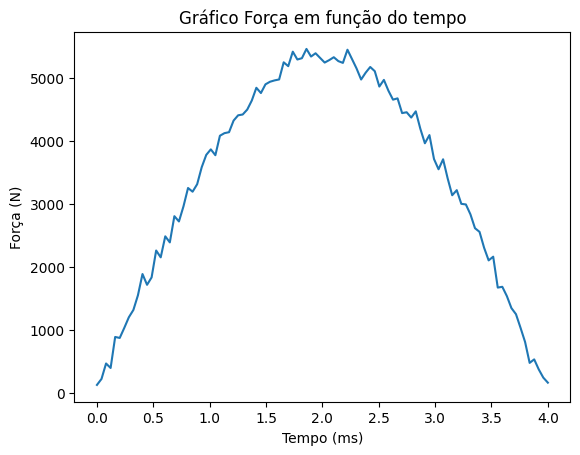

In [ ]:
#ler o arquivo e gerar um grafico força x tempo (com o tempo em ms)
df = np.loadtxt("Lucas Melo de Carvalho - dados_forca.txt")
F = df[:,1]
t = df[:,0]

#transformar os dados de tempo para ms
tmp = t*1000
'''
print(F)
print(t)
'''

#plotar gráfico Fxt
plt.plot(tmp,F)
plt.title("Gráfico Força em função do tempo")
plt.xlabel("Tempo (ms)")
plt.ylabel("Força (N)")
plt.show()

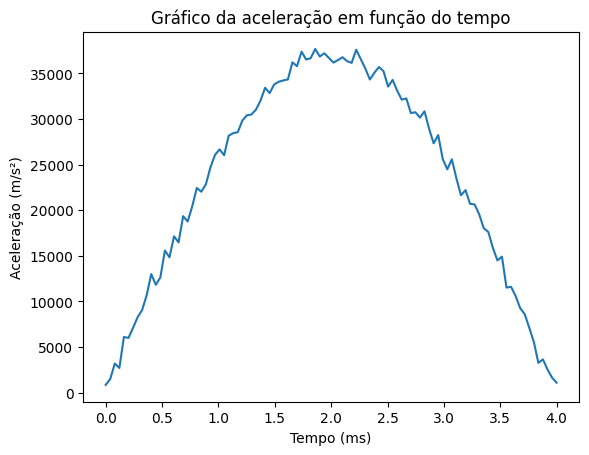

In [ ]:
#calcular aceleração da bola e fazer gráfico aceleração em função do tempo

# Da 2ª lei de Newton: F = ma => a = F/m
m = 0.145
a = F/m

plt.plot(tmp,a)
plt.title("Gráfico da aceleração em função do tempo")
plt.xlabel("Tempo (ms)")
plt.ylabel("Aceleração (m/s²)")
plt.show()

In [ ]:
#calcular o impulso da força
# usando a regra do trapézio para calcular a integral de F.t
I = np.trapz(F,t)
print(f'O impulso da força é {I} N.s')

O impulso da força é 13.611668396820125 N.s


In [ ]:
#f -> vetor a
#ti = t[0]
#tf = t[-1]
#v0 = -40.1 m/s
#N = t.size

#definir metodo de euler
def met_euler(a,t,v0,N):
  dt = (t[-1] - t[0])/(N-1)
  vp = np.zeros_like(a)
  vp[0] = v0

  for i in range(1,len(t)):
    vp[i] = vp[i-1] + a[i-1]*dt
  return vp


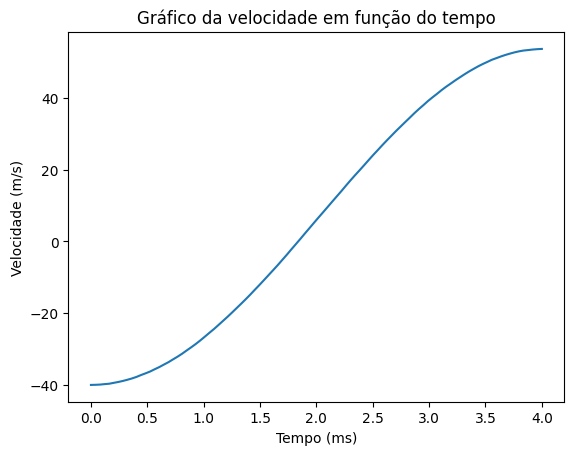

In [ ]:
#Encontrar a velocidade da bola e plotar grafico velocidade x tempo

v = met_euler(a,t,-40.1,t.size)

plt.plot(tmp,v)
plt.title("Gráfico da velocidade em função do tempo")
plt.xlabel("Tempo (ms)")
plt.ylabel("Velocidade (m/s)")
plt.show()

In [ ]:
#Qual velocidade da bola ao deixar o taco?
#é dada pela velocidade no último instante de tempo(perda de contato do taco com a bola)

print(f'Velocidade na perda do contato = {v[-1]} m/s')

Velocidade na perda do contato = 53.76858618739113 m/s


## 2ª Questão

In [ ]:
#definir regra de Simpson
def regra_simpson(f,a,b,N):
  h = (b-a)/N
  k = np.arange(1,(N/2)+1)
  I = (h/3)*(f(a)+f(b)+4*np.sum(f(a+(2*k-1)*h)) + 2*np.sum(f(a+2*(k[:-1])*h)))
  return I

In [ ]:
#Usar a regra de Simpson para calcular F com H = 30 m
f = lambda z: 200*(z/(5+z))*np.exp((-2*z)/30)
F = regra_simpson(f,0,30,10000)
print(f'F = {F} N')


F = 1480.5684800859 N


In [ ]:
#calcular a linha de ação da força dada pela expressão d
def integral_f(f,H,N):
  return regra_simpson(lambda z:f(z),0,H,N)

def integral_zf(f,H,N):
  return regra_simpson(lambda z:z*f(z),0,H,N)

def linha_acao(f,H,N):
  return integral_zf(f,H,N)/integral_f(f,H,N)

def f(z, H):
    return 200*(z/(5+z))*np.exp((-2*z)/H)

d = linha_acao(lambda z: f(z,30),30,10000)
print(f'd = {d} para H = 30')


d = 13.053698375036644 para H = 30


## 3ª Questão

Reescrevendo as equações como um sistema de EDOs de 1ª ordem:
\begin{align}
\frac{dx}{dt} &= v_x,  \\  
\frac{dv_x}{dt} &= -GM\frac{x}{r^2\sqrt{r^2+\frac{L^2}{4}}}, \\
\frac{dy}{dt} &= v_y, \\
\frac{dv_y}{dt} &= -GM\frac{y}{r^2\sqrt{r^2+\frac{L^2}{4}}} \\
\end{align}

Com isso definimos o vetor p com as 4 soluções $(x,v_x,y,v_y)$ e vamos resolver o sistema $\frac{dp}{dt} = F(p,t) $

In [14]:
#Definição das constantes
G = 1
M = 10
L = 2

In [15]:
#Função que define nosso sistema de EDOs (retorna as expressões das derivadas)
def sist_EDO(valores_iniciais):
  x,y,vx,vy = valores_iniciais
  r = np.sqrt(x**2 + y**2)
  fator_comum = -G*M/(r**2 * np.sqrt(r**2 + (L/2)**2))

  ax = fator_comum*x
  ay = fator_comum*y

  return np.array([vx,vy,ax,ay])

In [16]:
#Implementação do método RK4 para resolução do problema:
def RK4 (F,valores,dt):
  k1 = dt*F(valores)
  k2 = dt*F(valores + 0.5*k1)
  k3 = dt*F(valores + 0.5*k2)
  k4 = dt*F(valores + k3)
  return valores + (k1 + 2*k2 + 2*k3 + k4)/6

In [17]:
# Condições iniciais
t0 = 0
tf = 10

#garantir que os pontos de t0 a tf estejam na contagem
dt = 0.01
num_steps = int((tf - t0) / dt) + 1

val = np.array([1.0, 0.0, 0.0, 1.0])  # [x, y, vx, vy]
tp = np.linspace(t0, tf, num_steps)

# Arrays para armazenar as soluções
xp = []
yp = []

# Loop de integração
for t in tp:
    xp.append(val[0])
    yp.append(val[1])
    val = RK4(sist_EDO,val,dt)

# Converter para arrays NumPy
xp = np.array(xp)
yp = np.array(yp)

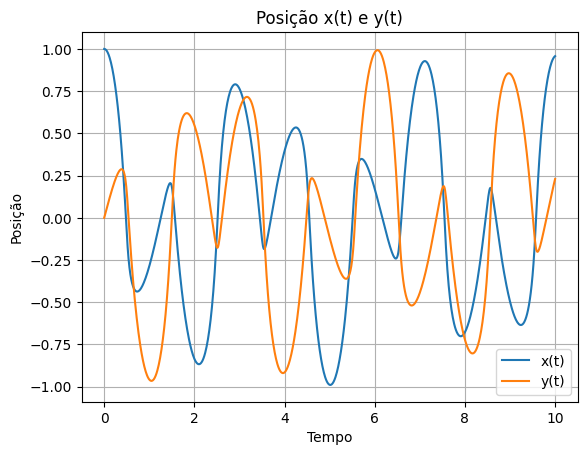

In [19]:
# x(t) e y(t) ao longo do tempo
plt.plot(tp, xp, label="x(t)")
plt.plot(tp, yp, label="y(t)")
plt.xlabel("Tempo")
plt.ylabel("Posição")
plt.title("Posição x(t) e y(t)")
plt.legend()
plt.grid()

plt.show()

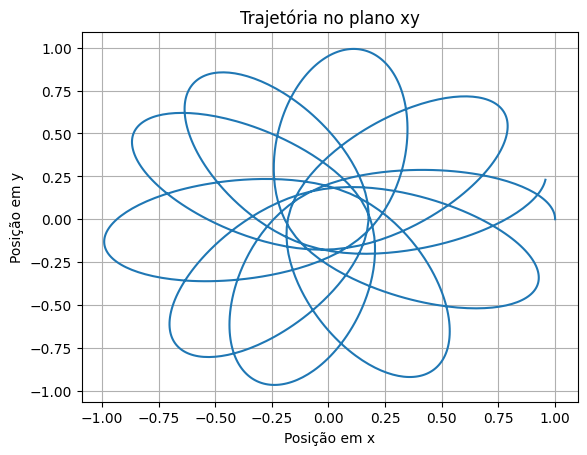

In [21]:
#Plotar o gráfico da órbita de rolamento (y versus x)

plt.plot(xp, yp, label="Trajetória")
plt.xlabel("Posição em x")
plt.ylabel("Posição em y")
plt.title("Trajetória no plano xy")

plt.grid()
plt.show()

É semelhante pois a órbita de rolamento é elíptica (planetas em torno do Sol traçam órbitas elípticas com o Sol em um dos focos). Também possuem forças de natureza semelhante, ambas inversamente proporcionais ao quadrado da distância, que leva a trajetórias similares, e assim como planetas retornam periodicamente ao mesmo ponto de sua órbita, o rolamento realiza um movimento periódico ao redor da barra.